# processing the data

In [15]:
import pandas as pd

def Count_All_Reviews():
    data=pd.read_csv("./hotel_reviews.csv")
    df=pd.DataFrame(data)
    print(df['Review_Date'].count())

Count_All_Reviews()


1032


In [27]:
#Retrieve the reviews for a hotel where the hotel name is specified by the user.

def HotelReview_ByHotelName(name):
    data=pd.read_csv("./hotel_reviews.csv")
    df=pd.DataFrame(data)
    HotelReviews=df[['Hotel_Name','Positive_Review','Negative_Review']]
    Get_review = HotelReviews[HotelReviews["Hotel_Name"]==name]
    return Get_review

HotelReview_ByHotelName("Hotel Arena")

,Hotel_Name,Positive_Review,Negative_Review
0,Hotel Arena,Only the park outside of the hotel was beautiful,I am so angry that i made this post available ...


In [34]:
#Retrieve the reviews for the dates specified by the user.
def HotelReviewsByDate(date):
    data=pd.read_csv("./hotel_reviews.csv")
    df=pd.DataFrame(data)
    GetReviewByDate=df[["Review_Date",'Hotel_Name','Positive_Review','Negative_Review']]
    getReview=GetReviewByDate[GetReviewByDate["Review_Date"]==date]
    return getReview
HotelReviewsByDate("01/04/2017")

,Review_Date,Hotel_Name,Positive_Review,Negative_Review
3,01/04/2017,Apex Temple Court Hotel,Large bathroom with great elemis toiletries co...,No Negative
323,01/04/2017,Arbor Hyde Park,The only positive thing I can say about this h...,The staff are extremely rude Shortly after I c...
459,01/04/2017,Best Western Hotel Montmartre Sacr Coeur,I like the staff nice welcome and the all serv...,No Negative


In [50]:
# - Retrieve all the reviews grouped by the reviewer’s nationality.
def grpbyReviewsNationatlity():
    data=pd.read_csv("./hotel_reviews.csv")
    df=pd.DataFrame(data)
    reviews_by_nationality = df.groupby("Reviewer_Nationality").agg(list).head()
    return reviews_by_nationality

grpbyReviewsNationatlity()

,Review_Date,Hotel_Name,Positive_Review,Negative_Review,Reviewer_Score,Total_Reviews_By_Reviewer,Tags,days_since_review
Reviewer_Nationality,,,,,,,,
Argentina,[08/21/2015],[LaGare Hotel Milano Centrale MGallery by Sofi...,[The elegant decoration High standard in bed l...,[No Negative],[9.2],[6],"[[' Leisure trip ', ' Couple ', ' Superior Twi...",[713 day]
Australia,"[04/11/2017, 08/06/2016, 05/24/2017, 02/13/201...","[Grand Royale London Hyde Park, The Victoria, ...",[Lobby and aesthetic appearance down stairs is...,[Rooms can do with some TLC and are much small...,"[4.6, 10.0, 8.8, 10.0, 5.4, 8.8, 9.6, 7.1, 9.6...","[5, 22, 1, 12, 1, 1, 6, 34, 3, 3, 1, 1, 9, 2, ...","[[' Leisure trip ', ' Couple ', ' Superior Dou...","[114 day, 362 day, 71 days, 171 day, 369 day, ..."
Austria,"[04/18/2016, 05/15/2017, 01/11/2016, 06/03/2017]","[25hours Hotel beim MuseumsQuartier, Mercure H...",[Location design comfort and breakfast are ama...,[Staff is terrible The team is extremely young...,"[7.5, 9.2, 10.0, 10.0]","[6, 14, 56, 1]","[[' Leisure trip ', ' Group ', ' Superior Doub...","[472 day, 80 days, 570 day, 61 days]"
Bahrain,"[05/14/2017, 08/25/2016, 12/26/2016, 08/29/2015]","[Norfolk Towers Paddington, Hilton Vienna Danu...","[Perfect bed and breakfast was good, The locat...",[You need to walk 10 to 15 min to the metro an...,"[8.8, 5.4, 8.3, 9.6]","[16, 7, 2, 13]","[[' Leisure trip ', ' Group ', ' Club Twin Roo...","[81 days, 343 day, 220 day, 705 day]"
Bangladesh,[11/21/2015],[Best Western Hotel St George],[Location],[Room size],[7.9],[10],"[[' Business trip ', ' Solo traveler ', ' Stan...",[621 day]


In [67]:

def summarizeData():
    df = pd.read_csv("./hotel_reviews.csv")
    # Convert the Review_Date column to datetime format
    df['Review_Date'] = pd.to_datetime(df['Review_Date'])
    # Group the DataFrame by Review_Date and count the number of positive and negative reviews
    summary = df.groupby('Review_Date').agg({'Negative_Review': 'count', 'Positive_Review': 'count', 'Reviewer_Score': 'mean'})
    # Rename the columns
    summary = summary.rename(columns={'Negative_Review': 'Total Negative Reviews', 'Positive_Review': 'Total Positive Reviews', 'Reviewer_Score': 'Average Rating'})
    # Sort the summary DataFrame by Review_Date in ascending order
    summary = summary.sort_values(by='Review_Date', ascending=True)
    print(summary)

summarizeData()




             Total Negative Reviews  Total Positive Reviews  Average Rating
Review_Date                                                                
2015-08-04                        4                       4        6.575000
2015-08-05                        1                       1        7.100000
2015-08-06                        3                       3        9.033333
2015-08-07                        1                       1        9.600000
2015-08-08                        1                       1        7.100000
...                             ...                     ...             ...
2017-07-30                        1                       1        5.000000
2017-07-31                        2                       2        8.950000
2017-08-01                        1                       1        9.600000
2017-08-02                        6                       6        8.683333
2017-08-03                        4                       4        7.300000

[518 rows x

# Visualize the data

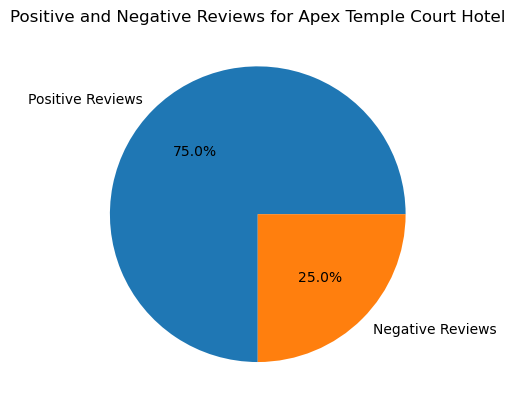

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

def hotelReviewInPieChart(name):
    df = pd.read_csv("./hotel_reviews.csv")
    Hotel_Review = df[df["Hotel_Name"]==name]
    totalNegRev = Hotel_Review[Hotel_Review['Negative_Review']!="No Negative"]['Negative_Review'].count()
    totalPosRev = Hotel_Review[Hotel_Review['Positive_Review']!="No Positive"]['Positive_Review'].count()
    labels = 'Positive Reviews', 'Negative Reviews'
    sizes = [totalPosRev, totalNegRev]
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels,autopct='%1.1f%%')
    ax.set_title('Positive and Negative Reviews for '+name)
    plt.show()
hotelReviewInPieChart('Apex Temple Court Hotel')



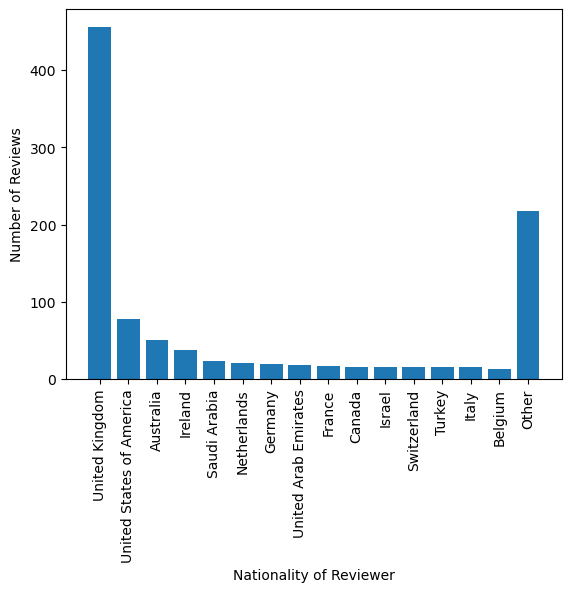

In [6]:
#  Display the number of reviews per the nationality of a reviewer. 
# This should by ordered by the number of reviews, highest first, and should show the top 15 + “Other” nationalities.
def NationalityGraph():
    # Read the data into a pandas dataframe
    df = pd.read_csv("./hotel_reviews.csv")
    # Group the data by reviewer nationality and count the number of reviews per nationality
    nationality_counts = df.groupby('Reviewer_Nationality').size().reset_index(name='Num_Reviews')
    # Sort the data by the number of reviews in descending order
    nationality_counts = nationality_counts.sort_values('Num_Reviews', ascending=False)
    # Get the top 15 nationalities and combine the rest as "Other"
    top_nationalities = list(nationality_counts.head(15)['Reviewer_Nationality'].values)
    other_nationality_count = nationality_counts[~nationality_counts['Reviewer_Nationality'].isin(top_nationalities)]['Num_Reviews'].sum()
    nationality_counts = nationality_counts[nationality_counts['Reviewer_Nationality'].isin(top_nationalities)]
    nationality_counts = pd.concat([nationality_counts, pd.DataFrame({'Reviewer_Nationality': ['Other'], 'Num_Reviews': [other_nationality_count]})])
    # Plot the data as a bar chart
    plt.bar(nationality_counts['Reviewer_Nationality'], nationality_counts['Num_Reviews'])
    plt.xticks(rotation=90)
    plt.xlabel('Nationality of Reviewer')
    plt.ylabel('Number of Reviews')
    plt.show()
NationalityGraph()

C:\Users\arsal\AppData\Local\Temp\ipykernel_17396\2964112702.py:21: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, data.shape[0])
C:\Users\arsal\AppData\Local\Temp\ipykernel_17396\2964112702.py:21: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, data.shape[0])


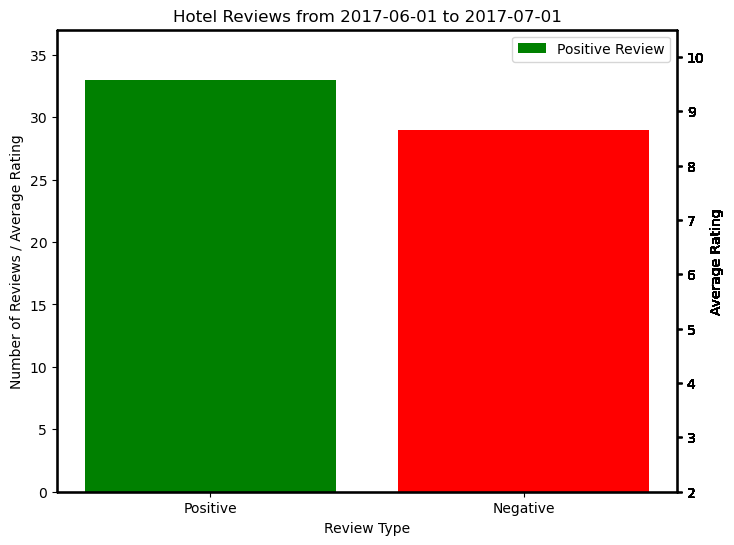

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

df = pd.read_csv("./hotel_reviews.csv")
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
fig, ax = plt.subplots(figsize=(8, 6))

def animate(i):
    start_date = pd.Timestamp('2015-07-01') + pd.DateOffset(months=i)
    end_date = start_date + pd.DateOffset(months=1)
    data = df[(df['Review_Date'] >= start_date) & (df['Review_Date'] < end_date)]
    totalNegRev = data[data['Negative_Review']!="No Negative"]['Negative_Review'].count()
    totalPosRev = data[data['Positive_Review']!="No Positive"]['Positive_Review'].count()
    avg_rating = data['Reviewer_Score'].mean()
    ax.clear()
    ax.set_title(f"Hotel Reviews from {start_date.date()} to {end_date.date()}")
    ax.set_xlabel("Review Type")
    ax.set_ylabel("Number of Reviews / Average Rating")
    ax.bar(["Positive", "Negative"], [totalPosRev, totalNegRev], color=["green", "red"])
    ax.set_ylim(0, data.shape[0])
    ax.legend(labels=['Positive Review', 'Negative Review'], loc='best')
    ax2 = ax.twinx()
    # ax2.plot(["Average Rating"], [avg_rating], marker="o", markersize=8, color="blue")
    ax2.set_ylim(df['Reviewer_Score'].min()-0.5, df['Reviewer_Score'].max()+0.5)
    ax2.set_ylabel("Average Rating")

def
anim = animation.FuncAnimation(fig, animate, frames=24)
anim.save('hotel_reviews_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
plt.show()
